In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_2017 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2017_clean.csv', encoding='utf-8')
df_2018 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2018_clean.csv', encoding='utf-8')
df_2019 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2019_clean.csv', encoding='utf-8')

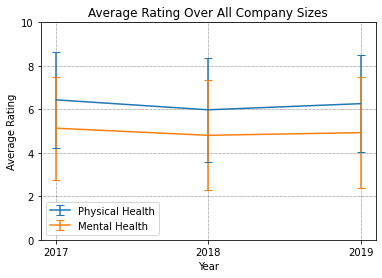

In [3]:
# 64 - Overall, how much importance does your employer place on physical health? (0-10)
# 65 - Overall, how much importance does your employer place on mental health? (0-10)

X = ['2017', '2018', '2019']

y_64     = [df_2017['64'].mean(), df_2018['64'].mean(), df_2019['64'].mean()]
y_64_err = [df_2017['64'].std(), df_2018['64'].std(), df_2019['64'].std()]
y_65     = [df_2017['65'].mean(), df_2018['65'].mean(), df_2019['65'].mean()]
y_65_err = [df_2017['65'].std(), df_2018['65'].std(), df_2019['65'].std()]

plt.errorbar(X, y_64, y_64_err, capsize=4, label='Physical Health')
plt.errorbar(X, y_65, y_65_err, capsize=4, label='Mental Health')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.legend()
plt.title('Average Rating Over All Company Sizes')

plt.show()

In [4]:
company_size = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26-100': '26-100',
    '100-500': '100-500',
    '500-1000': '500-1000',
    'More than 1000': '1000+'
}

def m_means(dfs, years, _id):
    new_dfs = []
    for index, df in enumerate(dfs):
        temp = df[['8', _id]].groupby('8').mean().copy()
        new_dfs.append(temp.rename(columns={_id: years[index]}))
    return pd.concat(new_dfs, axis=1).transpose(copy=True)
    
def m_std(dfs, years, _id):
    new_dfs = []
    for index, df in enumerate(dfs):
        temp = df[['8', _id]].groupby('8').std().copy()
        new_dfs.append(temp.rename(columns={_id: years[index]}))
    return pd.concat(new_dfs, axis=1).transpose(copy=True)
   
dfs = [df_2017, df_2018, df_2019]
m_64_171819 = m_means(dfs, X, '64')
s_64_171819 = m_std(dfs, X, '64')
m_65_171819 = m_means(dfs, X, '65')
s_65_171819 = m_std(dfs, X, '65')

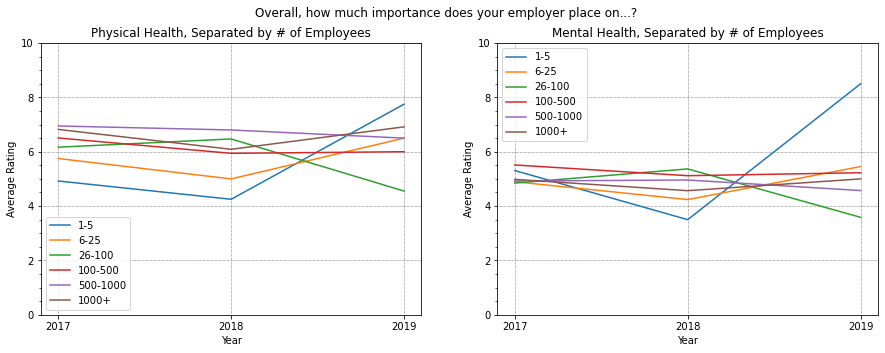

In [10]:
fig, (left, right) = plt.subplots(1, 2, figsize=(15,5))

for k, v in company_size.items():
    left.plot(X, m_64_171819[k], label=v)
left.set_xlabel('Year')
left.set_ylabel('Average Rating')
left.set_ylim(0, 10)
left.set_yticks(np.arange(0, 10, 0.5), minor=True)
left.grid(which='major', linestyle=':', linewidth='0.5', color='black')
left.legend()
left.set_title('Physical Health, Separated by # of Employees')

for k, v in company_size.items():
    right.plot(X, m_65_171819[k], label=v)
right.set_xlabel('Year')
right.set_ylabel('Average Rating')
right.set_ylim(0, 10)
right.set_yticks(np.arange(0, 10, 0.5), minor=True)
right.grid(which='major', linestyle=':', linewidth='0.5', color='black')
right.legend()
right.set_title('Mental Health, Separated by # of Employees')

plt.suptitle('Overall, how much importance does your employer place on...?')
plt.show()

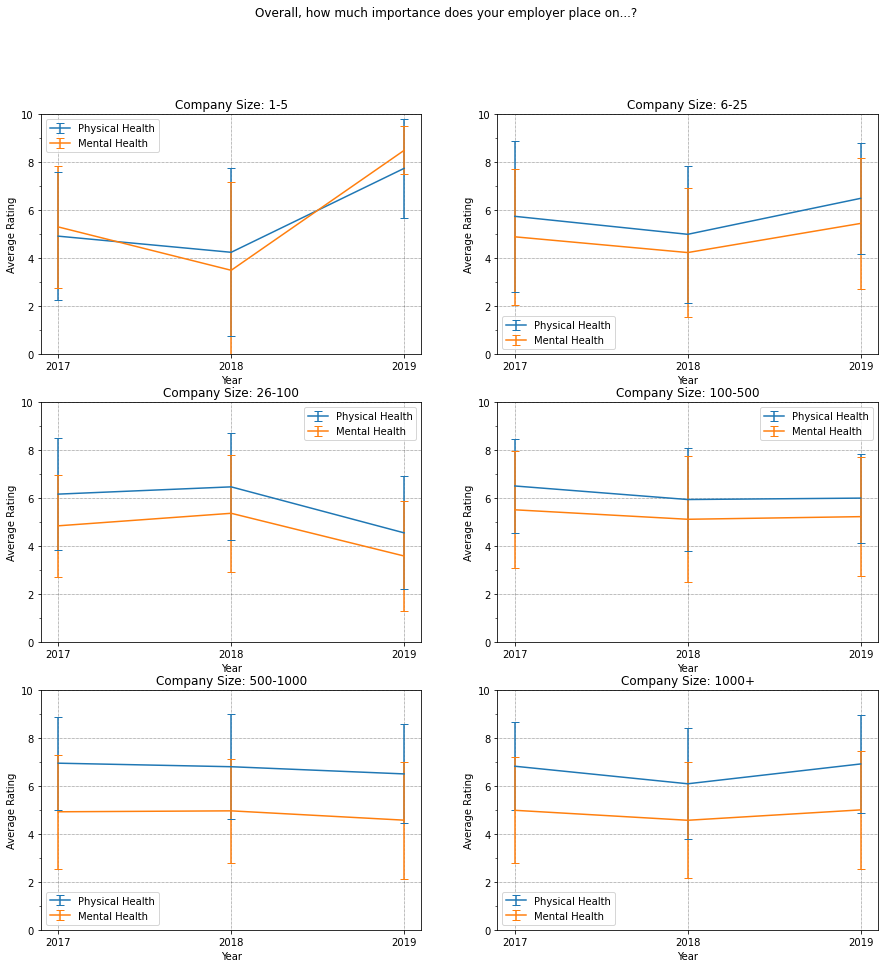

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2
    axs[_y, _x].errorbar(X, m_64_171819[k], s_64_171819[k], capsize=4, label='Physical Health')
    axs[_y, _x].errorbar(X, m_65_171819[k], s_65_171819[k], capsize=4, label='Mental Health')
    axs[_y, _x].set_xlabel('Year')
    axs[_y, _x].set_ylabel('Average Rating')
    axs[_y, _x].set_ylim(0, 10)
    axs[_y, _x].set_yticks(np.arange(0, 10, 1), minor=True)
    axs[_y, _x].grid(which='major', linestyle=':', linewidth='0.5', color='black')
    axs[_y, _x].legend()
    axs[_y, _x].set_title('Company Size: ' + v)
    
plt.suptitle('Overall, how much importance does your employer place on...?')
plt.show()